In [1]:
# Global imports and settings
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # Use 300 for PDF, 100 for slides
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

# Introduction
In this notebook, we will:
    
- Explain the main machine learning concepts
- Used scikit-learn to build a first model
- Learn our first algorithm (kNN)

# Types of machine learning
We often distinguish 3 `types` of machine learning:

- __Supervised Learning__: learn a model from labeled _training data_, then make predictions
- __Unsupervised Learning__: explore the structure of the data to extract meaningful information
- __Reinforcement Learning__: develop an agent that improves its performance based on interactions with the environment 

Note:

- Semi-supervised methods combine the first two.
- ML systems can combine many types in one system.

## Supervised Machine Learning

- Learn a model from labeled training data, then make predictions
- Supervised: we know the correct/desired outcome (label)

2 subtypes:
- Classification: predict a _class label_ (category), e.g. spam/not spam
    - Many classifiers can also return a _confidence_ per class
- Regression: predict a continuous value, e.g. temperature

Most supervised algorithms that we will see can do both.

![types](./images/01_supervised.png)

### Classification

- Class labels are discrete, unordered
- Can be _binary_ (2 classes) or _multi-class_ (e.g. letter recognition)
- Dataset can have any number of predictive variables (predictors)
    - Also known as the dimensionality of the dataset
- The predictions of the model yield a _decision boundary_ separating the classes

![classification](./images/01_classification.png)

### Regression

- Target variable is numeric
- Find the relationship between predictors and the target.
    - E.g. relationship between hours studied and final grade
- Example: Linear regression (fits a straight line)

![regression](./images/01_regression.png)

### Reinforcement learning

- Develop an agent that improves its performance based on interactions with the environment

![reinforcement learning](./images/01_rl.png)

![clustering](./images/01_cluster.png)

![dimred](./images/01_dimred.png)

![terminology](./images/01_terminology.png)

![pipelines](./images/01_ml_systems.png)

# scikit-learn
scikit-learn is the most prominent Python library for machine learning:

* Contains many state-of-the-art machine learning algorithms
* Offers [comprehensive documentation](http://scikit-learn.org/stable/documentation) about each algorithm
* Widely used, and a wealth of [tutorials](http://scikit-learn.org/stable/user_guide.html) and code snippets are available 
* scikit-learn works well with numpy, scipy, pandas, matplotlib,...

## Algorithms
See the [Reference](http://scikit-learn.org/dev/modules/classes.html)

__Supervised learning:__

* Linear models (Ridge, Lasso, Elastic Net, ...)
* Support Vector Machines
* Tree-based methods (Classification/Regression Trees, Random Forests,...)
* Nearest neighbors
* Neural networks 
* Gaussian Processes
* Feature selection

__Unsupervised learning:__
    
* Clustering (KMeans, ...)
* Matrix Decomposition (PCA, ...)
* Manifold Learning (Embeddings)
* Density estimation
* Outlier detection

__Model selection and evaluation:__

* Cross-validation
* Grid-search
* Lots of metrics

### Data import
Multiple options:

* A few toy datasets are included in `sklearn.datasets`
* You can import data files (CSV) with `pandas` or `numpy`
* You can import 1000s of machine learning datasets from OpenML

## Example: classification
Classify types of Iris flowers (setosa, versicolor, or virginica) based on the flower sepals and petal leave sizes.
![Iris image](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

Iris is included in scikitlearn, we can just load it.  
This will return a `Bunch` object (similar to a `dict`)

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print("Keys of iris_dataset: {}".format(iris_dataset.keys()))
print(iris_dataset['DESCR'][:193] + "\n...")

Keys of iris_dataset: dict_keys(['feature_names', 'target_names', 'data', 'DESCR', 'target'])
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


The targets (classes) and features are stored as `list`s, the data as an `ndarray`

In [4]:
print("Targets: {}".format(iris_dataset['target_names']))
print("Features: {}".format(iris_dataset['feature_names']))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("First 5 rows:\n{}".format(iris_dataset['data'][:5]))

Targets: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data: (150, 4)
First 5 rows:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


The targets are stored separately as an `ndarray`, with indices pointing to the features

In [5]:
print("Target names: {}".format(iris_dataset['target_names']))
print("Targets:\n{}".format(iris_dataset['target']))

Target names: ['setosa' 'versicolor' 'virginica']
Targets:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### First things first: Look at your data
We can use a library called `pandas` to easily visualize our data. Note how several features allow to cleanly split the classes.

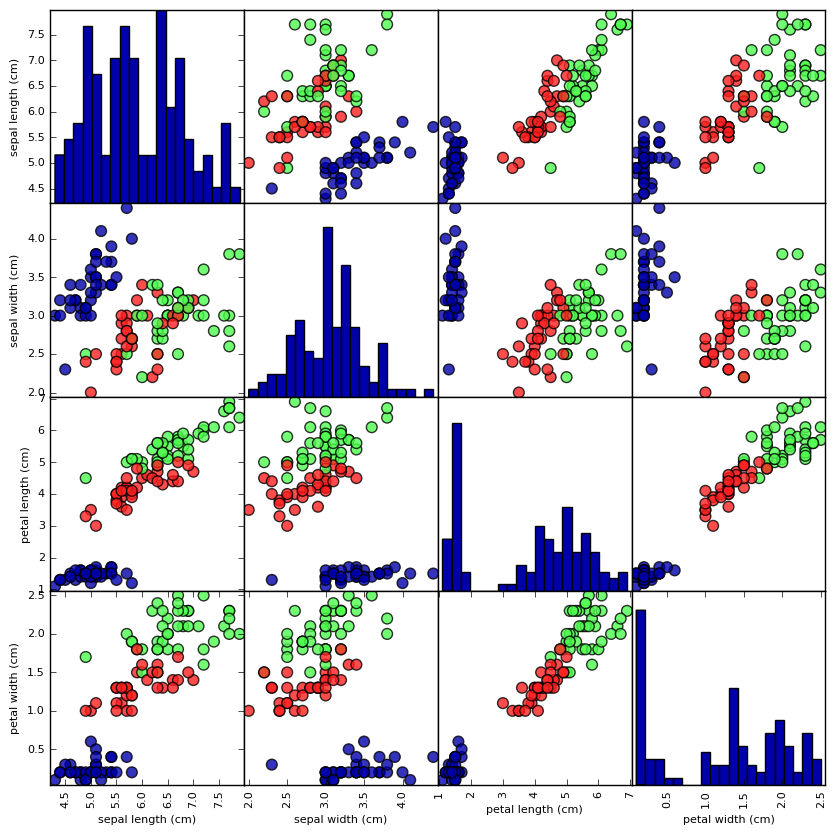

In [11]:
# Build a DataFrame with training examples and feature names
iris_df = pd.DataFrame(X_train, 
                       columns=iris_dataset.feature_names)

# scatter matrix from the dataframe, color by class
sm = pd.scatter_matrix(iris_df, c=y_train, figsize=(10, 10), 
                  marker='o', hist_kwds={'bins': 20}, s=60, 
                  alpha=.8, cmap=mglearn.cm3)

### Building your first model
All scikitlearn classifiers follow the same interface

In [ ]:
class SupervisedEstimator(...):
    def __init__(self, hyperparam, ...):

    def fit(self, X, y):   # Fit/model the training data
        ...                # given data X and targets y
        return self
     
    def predict(self, X):  # Make predictions
        ...                # on unseen data X  
        return y_pred
    
    def score(self, X, y): # Predict and compare to true
        ...                # labels y                
        return score

### Training and testing data
To evaluate our classifier, we need to test it on unseen data.  
`train_test_split`: splits data randomly in 75% training and 25% test data.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], 
    random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


Note: there are several problems with this approach that we will discuss later:

* Why 75%? Are there better ways to split?
* What if one random split yields  different models than another?
* What if all examples of one class all end up in the training/test set?

### Fitting a model

The first model we'll build is called k-Nearest Neighbor, or kNN. More about that soon.  
kNN is included in `sklearn.neighbors`, so let's build our first model

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Making predictions
Let's create a new example and ask the kNN model to classify it

In [16]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


### Evaluating the model
Feeding all test examples to the model yields all predictions

In [18]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


We can now just count what percentage was correct

In [20]:
print("Score: {:.2f}".format(np.mean(y_pred == y_test)))

Score: 0.97


The `score` function does the same thing (by default)

In [22]:
print("Score: {:.2f}".format(knn.score(X_test, y_test)))

Score: 0.97


## Generalization, Overfitting and Underfitting
* We __hope__ that the model can _generalize_ from the training to the test data: make accurate predictions on unseen data
* It's easy to build a complex model that is 100% accurate on the training data, but very bad on the test data
* Overfitting: building a model that is _too complex for the amount of data_ that we have
    * You model peculiarities in your data (noise, biases,...)
    * Solve by making model simpler (regularization), or getting more data
* Underfitting: building a model that is _too simple given the complexity of the data_
    * Use a more complex model

* There is often a sweet spot that you need to find by optimizing the choice of algorithms and hyperparameters, or using more data.  
![model complexity image](http://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png)

In all supervised algorithms that we will discuss, we'll cover:

- How do they work
- How to control complexity
- Hyperparameters (user-controlled parameters)
- Strengths and weaknesses

# k-Nearest Neighbor

* Building the model consists only of storing the training dataset. 
* To make a prediction, the algorithm finds the _k_ closest data points in the training dataset

## k-Nearest Neighbor Classification
for k=1: return the class of the nearest neighbor

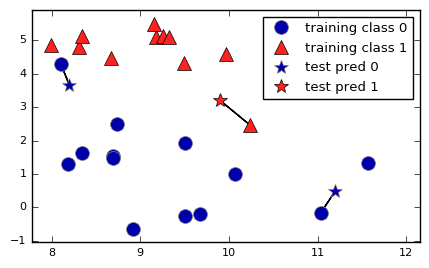

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

for k>1: do a vote and return the majority (or a confidence value for each class)

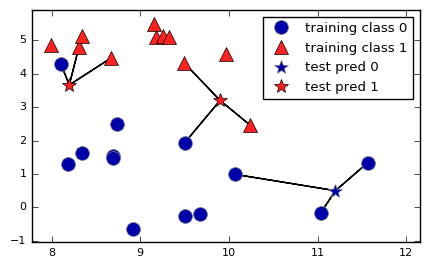

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Let's build a kNN model for this dataset (called 'Forge')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [5]:
print("Test set accuracy: %.2f" % clf.score(X_test, y_test))

Test set accuracy: 0.86


#### Analysis
We can plot the prediction for each possible input to see the _decision boundary_

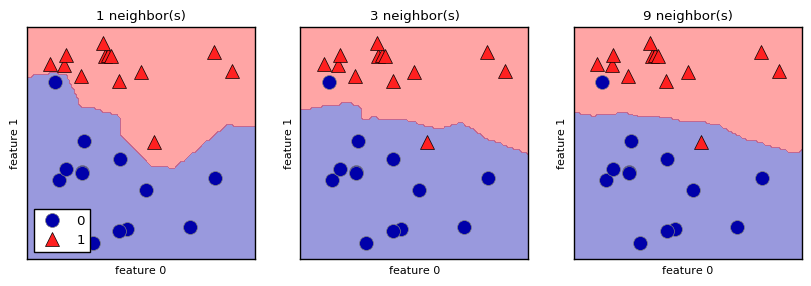

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
_ = axes[0].legend(loc=3)

Using few neighbors corresponds to high model complexity (left), and using many neighbors corresponds to low model complexity and smoother decision boundary (right).

We can more directly measure the effect on the training and test error on a larger dataset (breast_cancer)

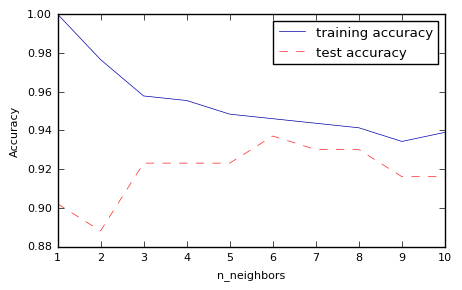

In [7]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Build a list of the training and test scores for increasing k
training_accuracy = []
test_accuracy = []
k = range(1, 11)

for n_neighbors in k:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # record training and test set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(k, training_accuracy, label="training accuracy")
plt.plot(k, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
_ = plt.legend()

For small numbers of neighbors, the model is too complex, and overfits the training data. As more neighbors are considered, the model becomes simpler and the training accuracy drops, yet the test accuracy increases, up to a point. After about 8 neighbors, the model starts becoming too simple (underfits) and the test accuracy drops again.

## k-Neighbors Regression
for k=1: return the target value of the nearest neighbor

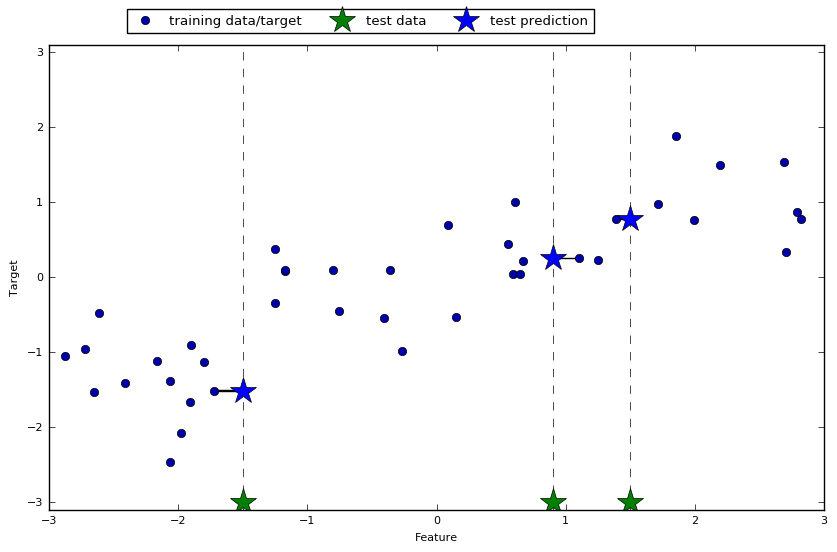

In [8]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

for k>1: return the _mean_ of the target values of the _k_ nearest neighbors

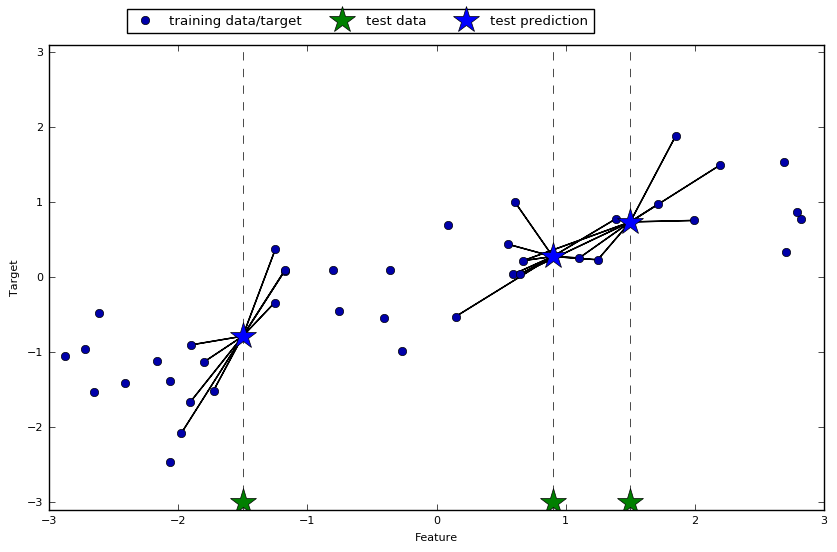

In [9]:
mglearn.plots.plot_knn_regression(n_neighbors=9
                                )

To do regression, simply use `KNeighborsRegressor` instead

In [10]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model, set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# Fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

The default scoring function for regression models is $R^{2}$. It measures how much of the data variability is explained by the model. Between 0 and 1.

In [11]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [12]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### Analysis
We can again output the predictions for each possible input, for different values of _k_.

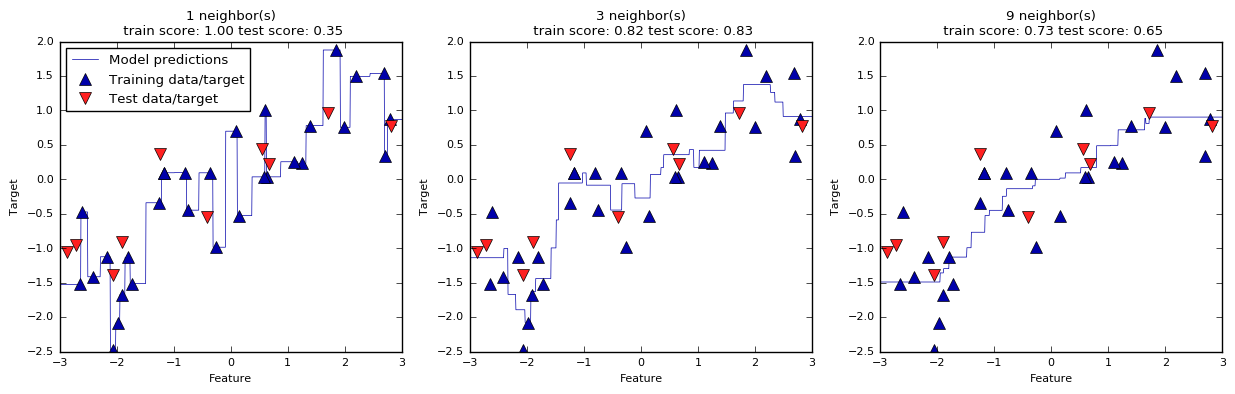

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
_ = axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

We see that again, a small _k_ leads to an overly complex (overfitting) model, while a larger _k_ yields a smoother fit.

## kNN: Strengths, weaknesses and parameters
* There are two important hyperparameters:
    * n_neighbors: the number of neighbors used
    * metric: the distance measures used
        * Default is Minkowski (generalized Euclidean) distance.
* Easy to understand, works well in many settings
* Training is very fast, predicting is slow for large datasets
* Bad at high-dimensional and sparse data (curse of dimensionality)